In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,learning_curve
#,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix

In [409]:
from  google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/quiz_bowl_data/'

Mounted at /content/drive/


In [410]:
train_df=pd.read_csv(PATH + 'qb.train.csv')
train_df.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [411]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row          8079 non-null   int64  
 1   body_score   8079 non-null   float64
 2   page         8079 non-null   object 
 3   answer       8079 non-null   object 
 4   text         8079 non-null   object 
 5   category     8079 non-null   object 
 6   tournaments  8079 non-null   object 
 7   answer_type  8079 non-null   object 
 8   corr         8079 non-null   bool   
 9   inlinks      8079 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 576.1+ KB


In [412]:
test_df=pd.read_csv(PATH + 'qb.test.csv')
test_df.head(20)

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11
5,139,57.336446,Comic fantasy,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,None,8
6,140,36.353865,Andromeda (mythology),"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,None,147
7,141,34.711254,Daisy Duck,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,char,13
8,142,25.126434,Robin Hood,"In a role as this mans daughter, Keira Knightl...",Literature,2008 Zot Bowl I,people,47
9,188,157.981108,Athos (fictional character),"In one book in which he appears, a commissary ...",Literature,2008 Cardinal Classic XVII,people,83


In [413]:
test_df.shape

(887, 8)

In [414]:
guess_df=pd.read_csv(PATH + 'qb.guess.csv')
guess_df.head()

,row,corr
0,31,False
1,32,False
2,33,False
3,88,True
4,91,True


In [415]:
guess_df.shape

(887, 2)

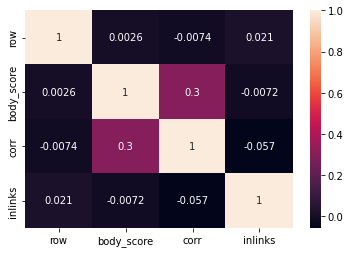

In [416]:
sns.heatmap(train_df.corr(), annot=True)

**TASK 2**

Cleaning the Training Data. the columns row, page,text,category would be dropped since they all have almost the same values. so they wont be needed.
As for tournament noticed that they each have a year attached to each tournament name. i'd like to extract the year and call it the tournament's year. the answertype, tournament(year), and the corr columns are categorical values. i'll use the get dummies function for that.

In [417]:
train_df['tournaments_year'] = train_df['tournaments'].str[:4].astype(int)
train_df = pd.get_dummies(train_df, columns=['answer_type'])
train_df=pd.get_dummies(train_df, columns=['tournaments_year'])
train_df.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df['corr']=train_df['corr'].map({True:1,False:0})
train_df

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2001,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,51.072087,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8075,42.298305,0,18,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8076,40.570231,0,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8077,37.679422,0,9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [418]:
train_df.shape

(8079, 24)

to predict whether the guesses are correct or not. using the corr columns as a determninant

In [419]:
X=train_df.drop(['corr'],axis=1)
Y=train_df['corr']
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [420]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6463, 23)
(1616, 23)
(6463,)
(1616,)


In [421]:
from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
x_train = ss_train.fit_transform(x_train)

ss_test = StandardScaler()
x_test = ss_test.fit_transform(x_test)

**this is used to normalize the numerical variable of the data... that is the body_score and inlinks**

**2A.**

**Using Classification models: the logistic regression, SVM (multiple kernels), and decision trees for model training**

**Logistic Regression Training Model**

In [422]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train,y_train)
# in sample
# lr_score=lr.score(x_train,y_train)
# lr_predictions=lr.predict(x_train)

# out sample
lr_score=lr.score(x_test,y_test)
# lr_score=cross_val_score(lr, x_test,y_test, cv=5,scoring='accuracy').mean()
lr_predictions=lr.predict(x_test)
lr_score=round(lr_score,3)
print('The accuracy of the Logistic Regression model is:', lr_score)

The accuracy of the Logistic Regression model is: 0.666


<!-- **the cross validation score was used to choose out of a random selected values which is the best accuracy prediction by taking the mean of 5 selected values from the data** -->

In [423]:
cm = confusion_matrix(lr_predictions, y_test)
print(cm)

[[729 372]
 [167 348]]


**SVM Training Model**

In [424]:
svm=SVC(C=100,max_iter=10000)
svm.fit(x_train,y_train)
svm_score=svm.score(x_test,y_test)
# svm_score=cross_val_score(svm, x_test,y_test, cv=5,scoring='accuracy').mean()
svm_score=round(svm_score,3)
print('The accuracy of the SVM model is: ', svm_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


The accuracy of the SVM model is:  0.745


In [425]:
svm_predictions=svm.predict(x_test)

In [426]:
cm = confusion_matrix(svm_predictions, y_test)
print(cm)

[[798 314]
 [ 98 406]]


**Decision Tree Training Model**

In [427]:
dt=DecisionTreeClassifier(max_depth=3,random_state=0)
dt.fit(x_train,y_train)
dt_score=dt.score(x_test,y_test)
# dt_score=cross_val_score(dt, x_test,y_test, cv=5,scoring='accuracy').mean()
dt_score=round(dt_score,3)
print('The accuracy of the SVM model is: ', dt_score)

The accuracy of the SVM model is:  0.754


In [428]:
dt_predictions=dt.predict(x_test)

In [429]:
cm = confusion_matrix(dt_predictions, y_test)
print(cm)

[[852 354]
 [ 44 366]]


**Creating a table with each accuracy for the medthods**

In [507]:
accuracy_of_model={
    "Logistic Regression": lr_score,
    "SVM": svm_score,
    "Decision Tree": dt_score
}
a_df = pd.DataFrame([accuracy_of_model])
a_df

,Logistic Regression,SVM,Decision Tree
0,0.666,0.745,0.754


**2B**

 **Look at where you’re making mistakes. Can you see any patterns?**


 Looking at the train data again, since i've used the 'tournaments' and 'answertype' to check for the accuracy for each method. i want to make use of the other categorical values. just to see how much improvement on accuracy i can get.


In [431]:
train_df_new=pd.read_csv(PATH+'qb.train.csv')
train_df_new

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0
...,...,...,...,...,...,...,...,...,...,...
8074,13920,51.072087,Lord Peter Wimsey,Snow Country,The author of this work later released a short...,Literature,2009 Buzzerfest,work,False,3
8075,13921,42.298305,Satires (Juvenal),Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,18
8076,13922,40.570231,Kubla Khan,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,None,False,8
8077,13923,37.679422,Asgard,Kaddish (poem),The subject of this poem finds refuge from Tro...,Literature,2009 Buzzerfest,abs,False,9


In [432]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   row          8079 non-null   int64  
 1   body_score   8079 non-null   float64
 2   page         8079 non-null   object 
 3   answer       8079 non-null   object 
 4   text         8079 non-null   object 
 5   category     8079 non-null   object 
 6   tournaments  8079 non-null   object 
 7   answer_type  8079 non-null   object 
 8   corr         8079 non-null   bool   
 9   inlinks      8079 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 576.1+ KB


In [433]:
train_df_new['category'].unique()

array(['Literature'], dtype=object)

In [434]:
train_df_new['text'].unique()

array(['First performed in Ludlow Castle by the children of the earl of Bridgewater, it involves a young lady who is left in the woods by her two brothers who have gone to find food.\tTaken from the Greek for "revel," characters include the river nymph Sabrina and the god of sensual pleasure, the son of Bacchus and Circe.\tFTP, name this masque by John Milton.',
       'This author is convinced by another to publish his work in The Hydra in Pat Barker\'s novel Regeneration.\tIn real life, this author claimed that "Neither should I go fooling over clouds / Following gleams unsafe, untrue" in one work, while the line "Whatever shares / The eternal reciprocity of tears" ends another of his works.',
       'This novel is comprised of six chapters, some of which bear the titles "Bela," "Taman," "The Princess Mary," and "Maksim Maksimovich.\t"  The title character, a Byronic superfluous man, is one of the great characters of Russian literature and is said to be modeled eerily after the autho

In [435]:
train_df_new['page'].unique()

array(['Comus (John Milton)', 'Circe', 'Satyr', ..., 'Regular expression',
       'Book of Proverbs', 'Kaddish (poem)'], dtype=object)

In [436]:
train_df_new['answer'].unique()

array(['Comus (John Milton)', 'Wilfred Owen', 'A Hero of Our Time', ...,
       'Aspasia', 'Ride of the Valkyries', 'Kaddish (poem)'], dtype=object)


**so the 'category' cant be used because it only has one value which is the same for all the data. 
Now trying to use the 'text' column feature to to measure how much i could improve the prediction accuracy by taking the length of the text**

In [437]:
train_df_new['tournaments_year'] = train_df_new['tournaments'].str[:4].astype(int)
train_df_new = pd.get_dummies(train_df_new, columns=['answer_type'])
train_df_new=pd.get_dummies(train_df_new, columns=['tournaments_year'])

**Extracting the New Feature ie the 'text' column**

In [438]:
train_df_new['text_length']=train_df_new['text'].str.len()
train_df_new.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,62,0,...,0,0,0,0,0,0,0,0,0,352
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,5,1,...,0,0,0,0,0,0,0,0,0,352
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,...,0,0,0,0,0,0,0,0,0,352
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,22,0,...,0,0,0,0,0,0,0,1,0,327
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,0,1,...,0,0,0,0,0,0,0,1,0,327


In [439]:
train_df_new['corr']=train_df_new['corr'].map({True:1,False:0})
train_df_new.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,...,tournaments_year_2002,tournaments_year_2003,tournaments_year_2004,tournaments_year_2005,tournaments_year_2006,tournaments_year_2007,tournaments_year_2008,tournaments_year_2009,tournaments_year_2010,text_length
0,127.398036,1,62,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
1,50.212336,0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
2,44.767071,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,352
3,44.058274,0,22,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,327
4,40.675249,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,327


**Training the New Models with the new feature**

In [440]:
new_x=train_df_new.drop(['corr'],axis=1)
new_y=train_df_new['corr']
x_train2, x_test2, y_train2, y_test2=train_test_split(new_x,new_y,test_size=0.2,random_state=0,stratify=Y)

In [441]:

ss_train2 = StandardScaler()
x_train2 = ss_train2.fit_transform(x_train2)

ss_test2 = StandardScaler()
x_test2 = ss_test2.fit_transform(x_test2)

In [442]:
lr.fit(x_train2,y_train2)
lr_score2=round(lr.score(x_test2,y_test2),3)
# lr_score2=round(cross_val_score(lr, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)


In [443]:
lr_predictions2=lr.predict(x_test2)
cm2 = confusion_matrix(lr_predictions2, y_test2)
print(cm2)

[[750 348]
 [146 372]]


In [444]:
svm.fit(x_train2,y_train2)
svm_score2=round(svm.score(x_test2,y_test2),3)
# svm_score2=round(cross_val_score(svm, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [445]:
svm_predictions2=svm.predict(x_test2)
cm2 = confusion_matrix(svm_predictions2, y_test2)
print(cm2)

[[836 262]
 [ 60 458]]


In [446]:
dt.fit(x_train2,y_train2)
dt_score2=round(dt.score(x_test2,y_test2),3)
# dt_score2=round(cross_val_score(dt, x_test2,y_test2, cv=5,scoring='accuracy').mean(),3)


In [447]:
dt_predictions2=dt.predict(x_test2)
cm2 = confusion_matrix(dt_predictions2, y_test2)
print(cm2)

[[862 361]
 [ 34 359]]


In [448]:
accuracy_of_model2={
    "Logistic Regression" : [lr_score,lr_score2],
    "SVM" : [svm_score,svm_score2],
    "Decision Tree":[dt_score,dt_score2]
}

In [504]:
a_df_new = pd.DataFrame(accuracy_of_model2)
a_df_new

,Logistic Regression,SVM,Decision Tree
0,0.666,0.745,0.754
1,0.694,0.801,0.756


**Task 3A**


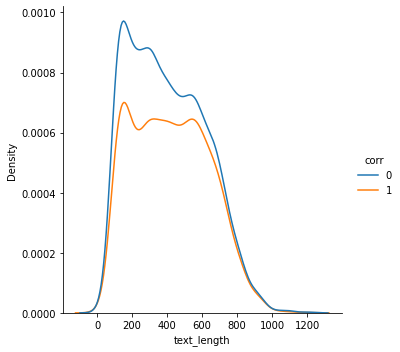

In [509]:
sns.displot(data=train_df_new, x='text_length', hue='corr', palette='tab10',kind='kde')
# sns.displot(data=train_df_new, x='text_length', hue='', kind='kde', palette='tab10', rug=True)


**Now to make use of the 'page' column Feature as well as adding the log of the inlink feature to see how much the prediction accuracy  improves**

In [451]:
train_df_new1=pd.read_csv(PATH+'qb.train.csv')
train_df_new1.head()

,row,body_score,page,answer,text,category,tournaments,answer_type,corr,inlinks
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,work,True,62
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,5
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,None,False,6
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,people,False,22
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,None,False,0


In [452]:
# train_df_new1['tournaments_year'] = train_df_new1['tournaments'].str[:4].astype(int)
train_df_new1 = pd.get_dummies(train_df_new1, columns=['answer_type'])
# train_df_new1=pd.get_dummies(train_df_new1, columns=['tournaments_year'])

In [453]:
train_df_new1['text_length']=train_df_new1['text'].str.len()
# train_df_new1['page_length']=train_df_new1['page'].str.len()
# train_df_new1['inlinks'] +=1
# train_df_new1['inlinks_log']=np.log2(train_df_new1['inlinks'])
train_df_new1['body_score&text_length']=train_df_new1['body_score']*train_df_new1['text_length']
# train_df_new1['body_score&page_length']=train_df_new1['body_score']*train_df_new1['page_length']

train_df_new1.head()

,row,body_score,page,answer,text,category,tournaments,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,text_length,body_score&text_length
0,1,127.398036,Comus (John Milton),Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,True,62,0,0,0,0,0,0,0,0,1,352,44844.108706
1,2,50.212336,Circe,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,5,1,0,0,0,0,0,0,0,0,352,17674.742171
2,3,44.767071,Satyr,Comus (John Milton),First performed in Ludlow Castle by the childr...,Literature,2000 ACF Nationals,False,6,1,0,0,0,0,0,0,0,0,352,15758.009078
3,4,44.058274,Philip K. Dick,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,22,0,0,0,0,0,0,1,0,0,327,14407.055571
4,5,40.675249,Honore de Balzac,Wilfred Owen,This author is convinced by another to publish...,Literature,2009 ACF Winter,False,0,1,0,0,0,0,0,0,0,0,327,13300.806490


In [454]:
new_df = pd.DataFrame(train_df_new1, columns=['body_score','inlinks','corr','text_length', 'body_score&text_length'])
new_df


,body_score,inlinks,corr,text_length,body_score&text_length
0,127.398036,62,True,352,44844.108706
1,50.212336,5,False,352,17674.742171
2,44.767071,6,False,352,15758.009078
3,44.058274,22,False,327,14407.055571
4,40.675249,0,False,327,13300.806490
...,...,...,...,...,...
8074,51.072087,3,False,461,23544.232113
8075,42.298305,18,False,347,14677.511977
8076,40.570231,8,False,347,14077.870232
8077,37.679422,9,False,347,13074.759450


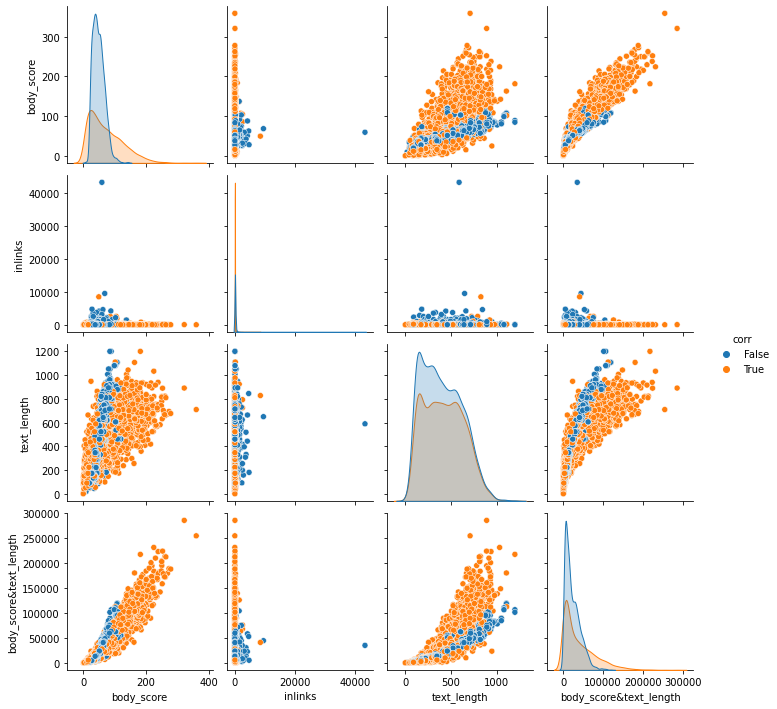

In [455]:
sns.pairplot(new_df, hue='corr',palette='tab10')

In [456]:
train_df_new1['corr']=train_df_new1['corr'].map({True:1,False:0})
train_df_new1.drop(['row','page','answer','text','category','tournaments'],axis=1,inplace=True)
train_df_new1.head()

,body_score,corr,inlinks,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,text_length,body_score&text_length
0,127.398036,1,62,0,0,0,0,0,0,0,0,1,352,44844.108706
1,50.212336,0,5,1,0,0,0,0,0,0,0,0,352,17674.742171
2,44.767071,0,6,1,0,0,0,0,0,0,0,0,352,15758.009078
3,44.058274,0,22,0,0,0,0,0,0,1,0,0,327,14407.055571
4,40.675249,0,0,1,0,0,0,0,0,0,0,0,327,13300.806490


In [457]:
new_x1=train_df_new1.drop(['corr'],axis=1)
new_y1=train_df_new1['corr']
x_train3, x_test3, y_train3, y_test3=train_test_split(new_x1,new_y1,test_size=0.2,random_state=0,stratify=Y)

In [458]:
ss_train3 = StandardScaler()
x_train3 = ss_train3.fit_transform(x_train3)

ss_test3 = StandardScaler()
x_test3 = ss_test3.fit_transform(x_test3)

**Training the New Models with the 'page' feature**

In [459]:
lr.fit(x_train3,y_train3)
lr_score3=round(lr.score(x_test3,y_test3),3)
# lr_score3=round(cross_val_score(lr, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)


In [460]:
lr_predictions3=lr.predict(x_test3)
cm3 = confusion_matrix(lr_predictions3, y_test3)
print(cm3)

[[754 338]
 [142 382]]


In [461]:
print('MSE:',mean_squared_error(y_test3,lr_predictions3))

MSE: 0.297029702970297


In [462]:
svm.fit(x_train3,y_train3)
svm_score3=round(svm.score(x_test3,y_test3),3)
# svm_score3=round(cross_val_score(svm, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [463]:
svm_predictions3=svm.predict(x_test3)
cm3 = confusion_matrix(svm_predictions3, y_test3)
print(cm3)

[[848 247]
 [ 48 473]]


In [464]:
dt.fit(x_train3,y_train3)
dt_score3=round(dt.score(x_test3,y_test3),3)
# dt_score3=round(cross_val_score(dt, x_test3,y_test3, cv=5,scoring='accuracy').mean(),3)


In [465]:
dt_predictions3=dt.predict(x_test3)
cm3 = confusion_matrix(dt_predictions3, y_test3)
print(cm3)

[[857 359]
 [ 39 361]]


In [498]:
accuracy_of_model3={
    "Logistic Regression" : [lr_score,lr_score2,lr_score3],
    "SVM" : [svm_score,svm_score2,svm_score3],
    "Decision Tree":[dt_score,dt_score2,dt_score3]
}

In [499]:
a_df_new1 = pd.DataFrame(accuracy_of_model3)
a_df_new1

,Logistic Regression,SVM,Decision Tree
0,0.666,0.745,0.754
1,0.694,0.801,0.756
2,0.703,0.817,0.754


**referring in continuation to Task 2b and 3a**


**when checking Given from the score. the prediction from the accuracy doesn't seem to improve after adding the 'page' column feature, the log of inlinks and also i had to remove the tournament years because i noticed there were improvements for the svm model**

**Task 3B.**


**After adding the Text feature, the prediction accuracy didnt improve as much as i thought it would, just a little. and also after adding the page feature, didnt improve the prediction accuracy that much as that of the text feature. on adding the log of inlinks there was no improvement. i also incoorporated the product of body score and textlength for feature interaction.**

**Y = B0 + B1x1 + B2x2 + B3x1x2**

**After Giving the normalization of the data that has been done(Standard Scaling). the accuracy seems to have improved a bit
so therefore the SVM has the highest prediction accuracy which will be used to test the predictions on the test data**

**Predicting on Test Data and Uploading to kaggle**

**Importing and Cleaning Testing Data**

In [468]:
test_df.head()

,row,body_score,page,text,category,tournaments,answer_type,inlinks
0,31,40.023617,Death in Venice,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,4
1,32,27.538799,The Eye of the World,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,1
2,33,26.976121,Carmilla,The protagonist of this novella is inspired to...,Literature,2001 ACF Fall,work,2
3,88,45.848831,A Passage to India,In a symbolic incident in this novel Ronny Hea...,Literature,2001 ACF Regionals,work,5
4,91,99.811169,The Cherry Orchard,"We first meet Fiers, the aging footman, in Act...",Literature,2001 ACF Regionals,work,11


In [469]:
# test_df['tournaments_year']= test_df['tournaments'].str[:4].astype(int)
test_df['text_length']=test_df['text'].str.len() #new feature
# test_df['page_length']=test_df['page'].str.len()#new feature
test_df.drop(['page','text','category','tournaments'],axis=1,inplace=True)
test_df = pd.get_dummies(test_df, columns=['answer_type'])
# test_df = pd.get_dummies(test_df, columns=['tournaments_year'])
# test_df['inlinks'] +=1
# test_df['inlinks_log']=np.log2(test_df['inlinks'])
test_df['body_score&Text_length']=test_df['body_score']*test_df['text_length']
# test_df['body_score&page_length']=test_df['body_score']*test_df['page_length']

test_df.head()

,row,body_score,inlinks,text_length,answer_type_None,answer_type_abs,answer_type_anim,answer_type_char,answer_type_event,answer_type_org,answer_type_people,answer_type_place,answer_type_work,body_score&Text_length
0,31,40.023617,4,245,0,0,0,0,0,0,0,0,1,9805.786104
1,32,27.538799,1,245,0,0,0,0,0,0,0,0,1,6747.005797
2,33,26.976121,2,245,0,0,0,0,0,0,0,0,1,6609.149668
3,88,45.848831,5,127,0,0,0,0,0,0,0,0,1,5822.801561
4,91,99.811169,11,551,0,0,0,0,0,0,0,0,1,54995.953908


In [470]:
test_df.shape

(887, 14)

In [471]:
# x_train3,x_test3=x_train3.align(test_df,join='left',axis=1)
# test_df.head()
# from xgboost import XGBRegressor
# model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
#                     n_jobs=10,subsample=1,min_child_weight=0.6)
# model.fit(x_train3,y_train3)
# preds_test=model.predict(x_test3)

In [472]:
guess_df['row'] = test_df['row']
test_df.drop('row', axis=1, inplace=True)

In [473]:
guess_df.head()

,row,corr
0,31,False
1,32,False
2,33,False
3,88,True
4,91,True


In [474]:
predict=svm.predict(test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [475]:
guess_df['corr']=predict
guess_df['corr']=guess_df['corr'].map({0:False, 1:True})
guess_df.head(50)

,row,corr
0,31,True
1,32,True
2,33,True
3,88,True
4,91,True
5,139,True
6,140,True
7,141,True
8,142,True
9,188,True


In [476]:
output=pd.DataFrame({'row':guess_df.row,'corr':guess_df['corr']})
output.to_csv('submission.csv', index=False,header=1)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [477]:
# plt.matshow(cm, cmap=plt.cm.gray)
# plt.show()

In [478]:
# plt.matshow(cm2, cmap=plt.cm.gray)
# plt.show()

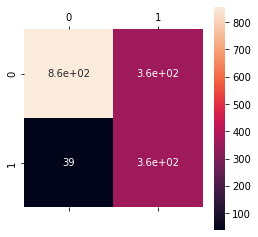

In [479]:
plt.matshow(cm3, cmap=plt.cm.gray)
sns.heatmap(cm3,annot=True)
plt.show()


In [480]:
def draw_learning_curves(new_x1,new_y1,estimator, num_trainings):
  train_sizes, train_scores, test_scores=learning_curve(estimator,new_x1,new_y1,cv=5,n_jobs=1, train_sizes=np.linspace(0.1,1.0,num_trainings))
  print(np.linspace(.1,1.0,num_trainings))
  print(train_sizes)
  print(train_scores)
  print(test_scores)
  train_scores_mean =np.mean(train_scores,axis=1)
  print(train_scores_mean)
  train_scores_std =np.std(train_scores,axis=1)
  test_scores_mean =np.mean(test_scores,axis=1)
  test_scores_std =np.std(test_scores,axis=1)

  plt.grid()
  plt.title("Learning Curves")
  plt.xlabel("Training Examples")
  plt.ylabel("Score")
  
  plt.plot(train_sizes,train_scores_mean, 'o-',color="g", label="Training score")
  plt.plot(train_sizes,test_scores_mean, 'o-',color="y", label="Cross-validation score")

  plt.legend(loc="best")
  plt.show()

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.6749226  0.74767802 0.74767802 0.74767802 0.74767802]
 [0.72095238 0.72714286 0.7047619  0.7047619  0.7047619 ]
 [0.71637591 0.71722003 0.72200338 0.72537985 0.72537985]
 [0.71126198 0.71665335 0.72004792 0.71325879 0.71805112]
 [0.71700449 0.71050596 0.71948012 0.72071793 0.72056321]]
[[0.72834158 0.72772277 0.7134901  0.71720297 0.71764706]
 [0.71967822 0.71967822 0.70668317 0.70420792 0.70402477]
 [0.72648515 0.72710396 0.71101485 0.70544554 0.71517028]
 [0.71844059 0.7289604  0.71596535 0.71287129 0.70835913]
 [0.72339109 0.72029703 0.71472772 0.71472772 0.71640867]]
[0.73312693 0.71247619 0.72127181 0.71585463 0.71765434]


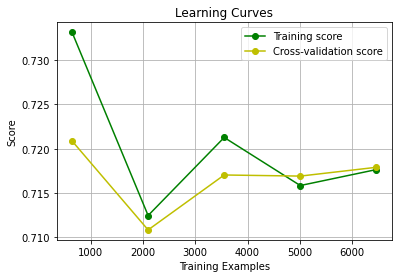

In [481]:
draw_learning_curves(new_x1,new_y1,lr, 5)




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.62693498 0.67182663 0.67182663 0.67182663 0.67182663]
 [0.64952381 0.68571429 0.65761905 0.65761905 0.65761905]
 [0.68007878 0.70118177 0.6736072  0.69105234 0.69105234]
 [0.67611821 0.67511981 0.70207668 0.70866613 0.68011182]
 [0.70988705 0.68203621 0.72381247 0.72597865 0.68497602]]
[[0.6404703  0.6299505  0.6460396  0.64727723 0.65572755]
 [0.63428218 0.68688119 0.6615099  0.65965347 0.67120743]
 [0.68502475 0.70358911 0.67945545 0.6875     0.69102167]
 [0.67079208 0.67945545 0.70544554 0.7085396  0.68111455]
 [0.69430693 0.68193069 0.72957921 0.71844059 0.68544892]]
[0.6628483  0.66161905 0.68739449 0.68841853 0.70533808]


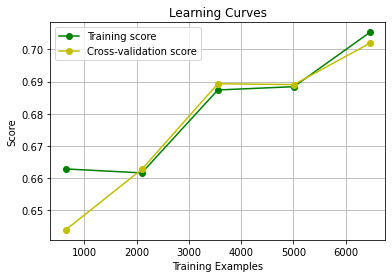

In [482]:
draw_learning_curves(new_x1,new_y1,svm, 5)

[0.1   0.325 0.55  0.775 1.   ]
[ 646 2100 3554 5008 6463]
[[0.73529412 0.79566563 0.79566563 0.79566563 0.79566563]
 [0.76428571 0.76285714 0.76095238 0.76095238 0.76095238]
 [0.76167698 0.76055149 0.76027012 0.76083286 0.76083286]
 [0.75898562 0.75978435 0.7561901  0.76377796 0.76257987]
 [0.7624942  0.76295838 0.76435092 0.76450565 0.75816184]]
[[0.75185644 0.75742574 0.76113861 0.75928218 0.7752322 ]
 [0.75556931 0.75866337 0.76113861 0.75618812 0.76965944]
 [0.7549505  0.75804455 0.76423267 0.75247525 0.76594427]
 [0.75247525 0.75680693 0.76361386 0.75247525 0.76718266]
 [0.75742574 0.7549505  0.76237624 0.75309406 0.7628483 ]]
[0.78359133 0.762      0.76083286 0.76026358 0.7624942 ]


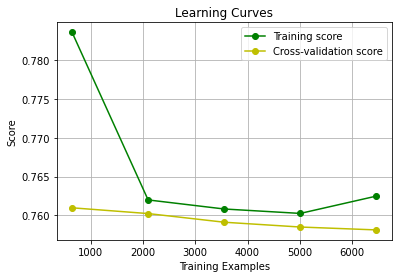

In [483]:
draw_learning_curves(new_x1,new_y1,dt, 5)

**Error Analysis**

**Given the learning curves above, this enabled me to determine if more data, more features are needed to improve the accuracy of the predictions on the model. Or maybe a new learning or model classifier can be used to improve the accuracy. it shows from the learning curve after adding the new features i.e text feature and page feature. there wasnt much improved performance (referring to Task 2B)especially when i added the page feature, the log of inlinks; the accuracy keeps decreasing. and i also observed that on removing the tournament year feature i engineered. the prediction accuracy on the SVM model improved;  i can say on a estimated average of 81% accuracy there about. i would still say its still a good accuracy despite using the 3 model classifers. From the learning curve, it also proves that the SVM model has the best improved accuracy than Logistic and Decision Tree models. Noticed that after adding the page feature and text feature and also adding a feature interaction of the product between body_score and text_length. the accuracy  improved for the models on the training and test data giving the increase. so i would say that from this error analysis that adding more features might not improve the accuracy of the model that much at this point but if possible using another model classifier might improve the accuracy. on manually checking the train data it was discovered that there are duplicates and but didnt seem to understand why. it shows from the data that for every person's answer to each feature values are being duplicated but on checking the train data directly it shows that there aren't duplicates. There seem to be a pattern whereby out of the number of answer duplicates for example, for four duplicates there would be only one correct answer(TRUE) and the rest would be an incorrect answer(FALSE). i thought reducing those duplicates would improve the accuracy but there arent any duplicates. i think this is difficult to determine if this can be corrected in a way because in terms of real world data i dont think this is correct.**  

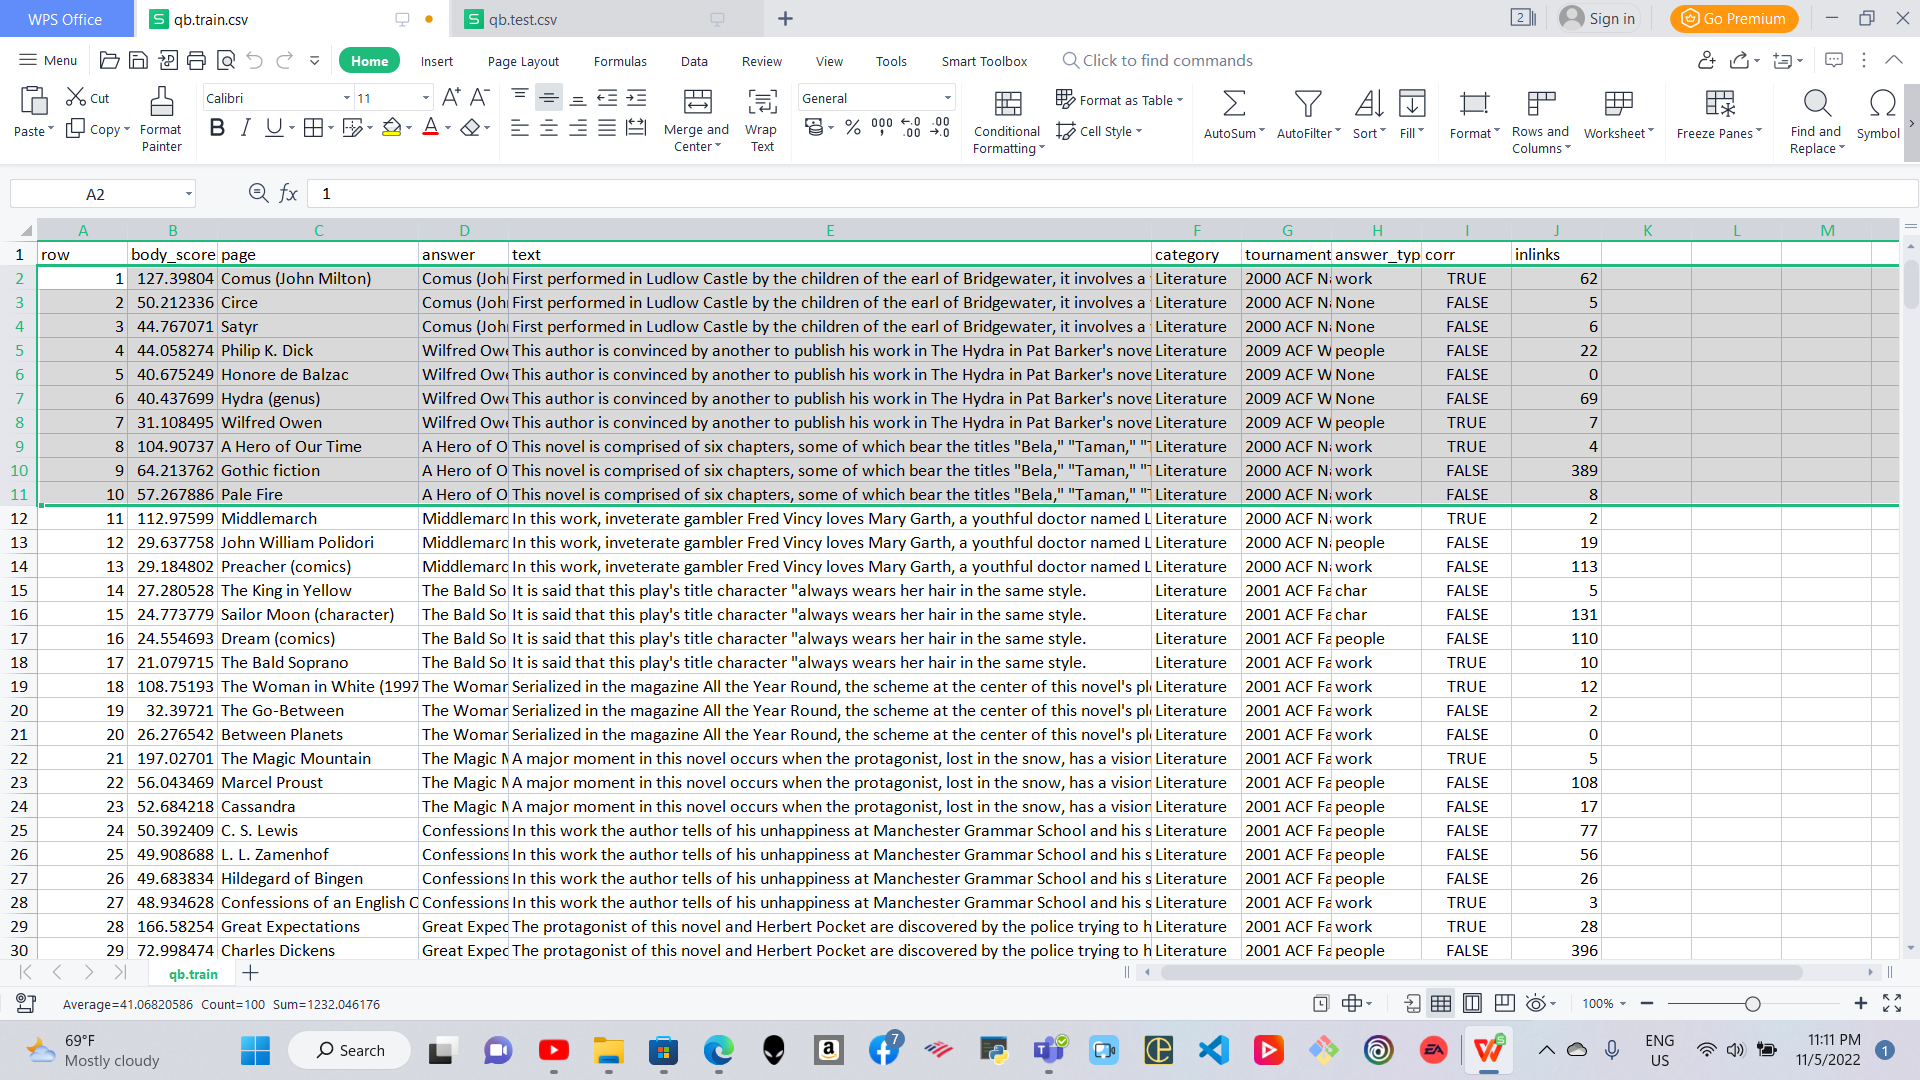